---
### **Optmization**
---
- It is the initial way to adjust the neurons’ input’s weights and biases to minimize loss
- It is about randomly changing the weights, checking the loss, and repeating this until happy with the lowest loss found.

In [1]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()

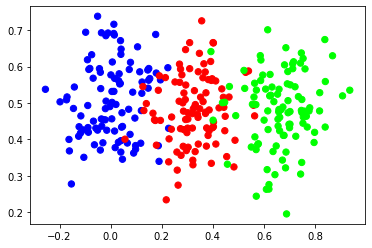

In [2]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1],c=y, s=40, cmap='brg')
plt.show()

In [3]:
class Loss:
    def calculate(self, output, y):
        sample_loss = self.forward(output, y)
        data_loss = np.mean(sample_loss)
        return data_loss

In [20]:
class CrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        #calculate sample
        sample = len(y_pred)
        #clip the y to prevent division by 0
        y_pred_clip = np.clip(y_pred, (1e-7), (1-1e-7))
        if len(y_pred_clip.shape) == 1:
            confidence = y_pred_clip[range(sample), y_true]
        elif len(y_pred_clip.shape) == 2:
            confidence = np.sum(y_true*y_pred_clip, axis = 1)
        negLL = -np.log(confidence)
        return negLL

In [21]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class DenseLayer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
class ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
class SoftMax:
    def forward(self, inputs):
        # get exponential values of each
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims=True))
        prob = exp_values / np.sum(exp_values, axis = 1, keepdims=True)
        self.output = prob

In [22]:
X, y = vertical_data(samples=100, classes=3)
dense = DenseLayer(2, 3)
dense2 = DenseLayer(3, 3)
relu = ReLU()
softmax = SoftMax()

In [23]:
loss_function = CrossEntropy()

In [24]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense.weights.copy()
best_dense1_biases = dense.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [25]:
for iteration in range(10000):
    # Generate a new set of weights for iteration
    dense.weights = 0.05 * np.random.randn(2, 3)
    dense.biases = 0.05 * np.random.randn(1, 3)
    dense2.weights = 0.05 * np.random.randn(3, 3)
    dense2.biases = 0.05 * np.random.randn(1, 3)
    # Perform a forward pass of the training data through this layer
    dense.forward(X)
    relu.forward(dense.output)
    dense2.forward(relu.output)
    softmax.forward(dense2.output)
    # Perform a forward pass through activation function
    # it takes the output of second dense layer here and returns loss
    loss = loss_function.calculate(softmax.output, y)
    # calculate values along first axis
    predictions = np.argmax(softmax.output, axis=1)
    accuracy = np.mean(predictions==y)
    # If loss is smaller - print and save weights and biases aside
    if loss < lowest_loss:
        
        print('New set of weights found, iteration:', iteration, "loss:", loss, 'acc:', accuracy)
              
        best_dense1_weights = dense.weights.copy()
        best_dense1_biases = dense.biases.copy()
        best_dense2_weights= dense2.weights.copy()
        best_dense2_biases = dense2.biases.copy()
              
        lowest_loss = loss

ValueError: operands could not be broadcast together with shapes (300,) (300,3) 